En esta práctica, aprenderemos a utilizar diferentes tipos de redes neuronales para realizar el análisis de sentimiento del dataset de Multilingual Amazon Reviews Corpus.

# Análisis, preprocesamiento y preparación de los datos

In [ ]:
#Cargamos los datasets

amazon_en_train = 'amazon_dataset_en_train.csv'
amazon_en_dev = 'amazon_dataset_en_dev.csv'
amazon_en_test = 'amazon_dataset_en_test.csv'

Vamos a concatenar todos los splits del dataset en un único dataframe, en el que creamos una columna especificando si el split es el dataset de entrenamiento, de validación o de evaluación.

In [ ]:
import pandas as pd

file_names = [(amazon_en_train, "train"), (amazon_en_dev, "dev"), (amazon_en_test, "test")]

df_list = []

for file_name, split_name in file_names:
  df = pd.read_csv(file_name)
  df["split"] = split_name
  df_list.append(df)

df = pd.concat(df_list)
df

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,split
0,en_0964290,product_en_0740675,reviewer_en_0342986,1,Arrived broken. Manufacturer defect. Two of th...,I'll spend twice the amount of time boxing up ...,en,furniture,train
1,en_0690095,product_en_0440378,reviewer_en_0133349,1,the cabinet dot were all detached from backing...,Not use able,en,home_improvement,train
2,en_0311558,product_en_0399702,reviewer_en_0152034,1,I received my first order of this product and ...,The product is junk.,en,home,train
3,en_0044972,product_en_0444063,reviewer_en_0656967,1,This product is a piece of shit. Do not buy. D...,Fucking waste of money,en,wireless,train
4,en_0784379,product_en_0139353,reviewer_en_0757638,1,went through 3 in one day doesn't fit correct ...,bubble,en,pc,train
...,...,...,...,...,...,...,...,...,...
4995,en_0681530,product_en_0198517,reviewer_en_0539725,5,"It's still early, but so far the scales seems ...",Very sleek.,en,drugstore,test
4996,en_0157408,product_en_0206198,reviewer_en_0605408,5,I’ve used this face mask a few times now and i...,... face mask a few times now and it works gre...,en,beauty,test
4997,en_0542558,product_en_0525205,reviewer_en_0727937,5,Great price. Good quality.,Five Stars,en,home,test
4998,en_0754850,product_en_0613095,reviewer_en_0643466,5,Fits my 2016 F150 XLT great. Now I dont have t...,2016 F150 XLT,en,automotive,test


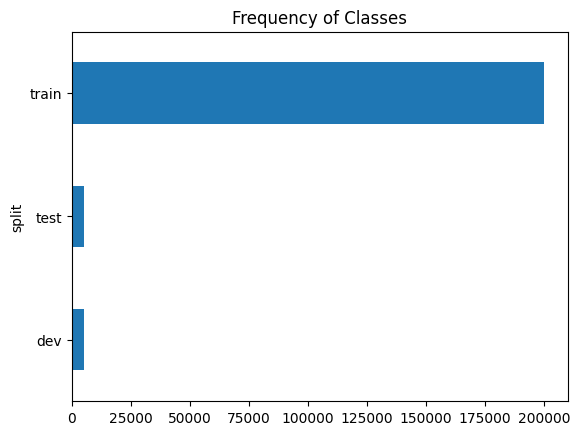

In [ ]:
# Distribución de instancias por split

import matplotlib.pyplot as plt

df["split"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.rcParams['figure.figsize'] = [10, 80]
plt.show()

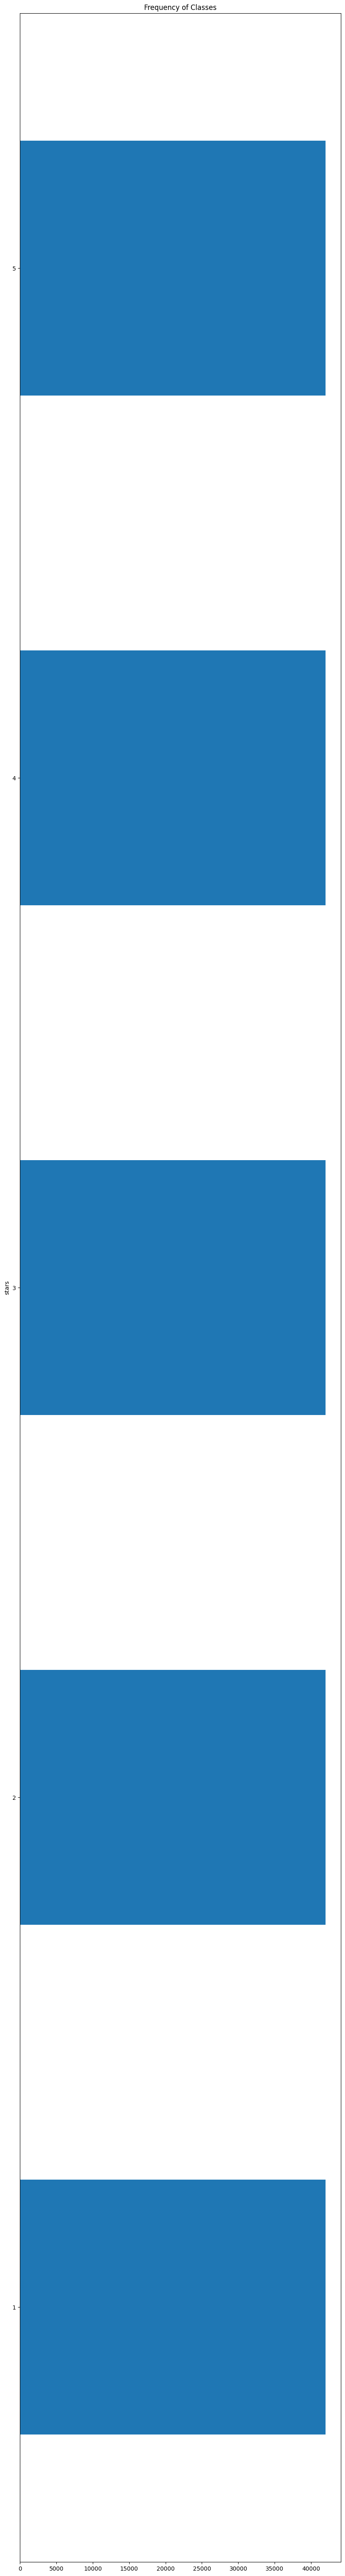

In [ ]:
# Distribucion de instancias por clases (i.e. estrellas)

df["stars"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.rcParams['figure.figsize'] = [10, 80]
plt.show()

In [ ]:
# Nos quedamos con las columnas que nos interesan
df = df[['review_body', 'stars', 'split']]
df

,review_body,stars,split
0,Arrived broken. Manufacturer defect. Two of th...,1,train
1,the cabinet dot were all detached from backing...,1,train
2,I received my first order of this product and ...,1,train
3,This product is a piece of shit. Do not buy. D...,1,train
4,went through 3 in one day doesn't fit correct ...,1,train
...,...,...,...
4995,"It's still early, but so far the scales seems ...",5,test
4996,I’ve used this face mask a few times now and i...,5,test
4997,Great price. Good quality.,5,test
4998,Fits my 2016 F150 XLT great. Now I dont have t...,5,test


Vamos a dividir nuevamente el dataframe en tres, uno por split, aleatorizar los conjuntos de datos, que estaban ordenados en función del número de estrellas.

In [ ]:
import random
random.seed(0)

df_train = df[df['split'] == 'train']
df_valid = df[df['split'] == 'dev']
df_test = df[df['split'] == 'test']

df_train = df_train.sample(frac=1)
df_valid = df_valid.sample(frac=1)
df_test = df_test.sample(frac=1)

df_train

,review_body,stars,split
103389,"Works well enough to make the connection, but ...",3,train
159129,I love the material. But I was hoping it to ha...,4,train
131677,It’s a good reading for the beginners of machi...,4,train
12135,These towels bleed the red color when used wit...,1,train
36665,I am in need of a warranty claim for this prod...,1,train
...,...,...,...
2355,Did not work with linux. Went to return it and...,1,train
128083,The color is beautiful! It matched perfectly w...,4,train
152948,"JD.had good looks, a confidence about himself,...",4,train
33159,It does not improve anything when applied. I h...,1,train


In [ ]:
X_train = df_train['review_body']
X_valid = df_valid['review_body']
X_test = df_test['review_body']

X_train

,review_body
103389,"Works well enough to make the connection, but ..."
159129,I love the material. But I was hoping it to ha...
131677,It’s a good reading for the beginners of machi...
12135,These towels bleed the red color when used wit...
36665,I am in need of a warranty claim for this prod...
...,...
2355,Did not work with linux. Went to return it and...
128083,The color is beautiful! It matched perfectly w...
152948,"JD.had good looks, a confidence about himself,..."
33159,It does not improve anything when applied. I h...


In [ ]:
y_train = df_train['stars'].map({1:0, 2:1, 3:2, 4:3, 5:4}).values
y_valid = df_valid['stars'].map({1:0, 2:1, 3:2, 4:3, 5:4}).values
y_test = df_test['stars'].map({1:0, 2:1, 3:2, 4:3, 5:4}).values
y_train

array([2, 3, 3, ..., 3, 0, 4])

# Entrenamiento de redes neuronales

En estas líneas de código se está realizando el preprocesamiento de texto para poder utilizar los datos de texto en un modelo de redes neuronales.

Primero, se importa la clase Tokenizer de Keras. Esta clase proporciona una forma simple de preprocesar datos de texto para su uso en modelos de redes neuronales.

Luego, se crea una instancia de Tokenizer y se ajusta a los datos de entrenamiento con el método fit_on_texts. Esto construye un vocabulario de todas las palabras únicas en los datos de entrenamiento y asigna a cada palabra un índice entero único.

A continuación, se utiliza el método texts_to_sequences para convertir los datos de entrenamiento, validación y prueba en secuencias de índices de palabras. Cada palabra en el texto se reemplaza por el índice correspondiente del vocabulario construido anteriormente.

Una vez que se han convertido los datos de texto en secuencias de índices, se pueden utilizar como entrada para un modelo de redes neuronales. Sin embargo, tendremos que utilizar la función pad_sequences de Keras para asegurarnos de que todas las secuencias tengan la misma longitud antes de proporcionarlas como entrada al modelo.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding, Bidirectional
from tensorflow.keras.models import Sequential
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot

from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

**Tokenización y preprocesamiento**

Propósito: Convertir texto en representación numérica que la red neuronal pueda procesar.
Proceso:

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

    Tokenizer():
        Crea un diccionario que asigna cada palabra única a un índice numérico.
        Ejemplo: {"el": 1, "servicio": 2, "excelente": 3, ...}.
    fit_on_texts(X_train):
        Analiza todos los textos de entrenamiento para construir el vocabulario.
        Solo se hace con los datos de entrenamiento para evitar "fugas" de información.


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_valid_seq = tokenizer.texts_to_sequences(X_valid)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_seq

[[80, 45, 147, 5, 142, 1, 902, 13, 554, 205, 106, 39, 20, 2903, 58, 11447],
 [2,
  65,
  1,
  214,
  13,
  2,
  15,
  510,
  3,
  5,
  19,
  58,
  1899,
  599,
  8,
  12,
  548,
  1,
  488,
  2999,
  268,
  56,
  282,
  16,
  288,
  86,
  4,
  262,
  288,
  396,
  3,
  15,
  58,
  16,
  288,
  223,
  4,
  1,
  823],
 [98,
  6,
  30,
  459,
  8,
  1,
  3402,
  10,
  742,
  1782,
  9,
  114,
  67,
  937,
  14,
  8633,
  42,
  94,
  10,
  12,
  31100,
  5,
  742,
  1782,
  129,
  1,
  2632,
  16,
  4201,
  3403,
  4,
  15688,
  14647,
  419,
  94,
  58,
  2063,
  6001,
  470,
  114],
 [31,
  1670,
  3793,
  1,
  588,
  146,
  43,
  87,
  18,
  21035,
  2748,
  12,
  410,
  7,
  1118,
  14,
  588,
  2692,
  4,
  57,
  6,
  585,
  5,
  527,
  61,
  100,
  116,
  555,
  18,
  31,
  1012,
  1094],
 [2,
  102,
  14,
  140,
  10,
  6,
  932,
  2090,
  8,
  9,
  35,
  3,
  7,
  11,
  197,
  3,
  7,
  99,
  391,
  1,
  10588,
  932,
  674,
  313],
 [21, 283, 214, 647, 95, 115],
 [71, 29, 21, 2125

In [ ]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'it': 3,
 'and': 4,
 'to': 5,
 'a': 6,
 'is': 7,
 'for': 8,
 'this': 9,
 'of': 10,
 'not': 11,
 'my': 12,
 'but': 13,
 'in': 14,
 'was': 15,
 'on': 16,
 'that': 17,
 'with': 18,
 'have': 19,
 'they': 20,
 'very': 21,
 'so': 22,
 'as': 23,
 'are': 24,
 'you': 25,
 'like': 26,
 'one': 27,
 'be': 28,
 'great': 29,
 'good': 30,
 'these': 31,
 'them': 32,
 'just': 33,
 'would': 34,
 'product': 35,
 'had': 36,
 'all': 37,
 'out': 38,
 'if': 39,
 'use': 40,
 'at': 41,
 'up': 42,
 'when': 43,
 'will': 44,
 'well': 45,
 'get': 46,
 'or': 47,
 'only': 48,
 'me': 49,
 'from': 50,
 'no': 51,
 'than': 52,
 'too': 53,
 'work': 54,
 'after': 55,
 'really': 56,
 "it's": 57,
 'more': 58,
 'time': 59,
 'what': 60,
 'off': 61,
 'were': 62,
 'because': 63,
 'quality': 64,
 'love': 65,
 'can': 66,
 'has': 67,
 'do': 68,
 'an': 69,
 'little': 70,
 'fit': 71,
 'about': 72,
 'did': 73,
 'bought': 74,
 'nice': 75,
 'we': 76,
 'other': 77,
 'does': 78,
 'much': 79,
 'works': 80,
 'even': 81

**Creación de secuencias y padding**

Estas líneas de código se utilizan para asegurar que todas las secuencias de texto tengan la misma longitud. Esto es necesario porque muchos modelos de redes neuronales requieren que la entrada tenga un tamaño fijo.

Primero, se calcula el tamaño del vocabulario a partir del objeto tokenizer creado anteriormente. Esto se hace sumando 1 al número de palabras únicas en el vocabulario, ya que el índice 0 se reserva para un token especial que se utiliza para rellenar las secuencias más cortas.

Luego, se establece la longitud máxima de las secuencias en 120. Esto significa que todas las secuencias se cortarán o rellenarán hasta tener una longitud de 120 tokens.

Finalmente, se utiliza la función pad_sequences de Keras para rellenar o cortar las secuencias de entrenamiento, validación y prueba hasta tener una longitud de 120. La opción padding='post' indica que el relleno se debe añadir al final de la secuencia. Si se elige padding='pre', el relleno se añadirá al principio de la secuencia.

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
maxlen = 120

X_train_pad = pad_sequences(X_train_seq, padding='post', maxlen=maxlen)
X_valid_pad = pad_sequences(X_valid_seq, padding='post', maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, padding='post', maxlen=maxlen)

X_train_pad

array([[   80,    45,   147, ...,     0,     0,     0],
       [    2,    65,     1, ...,     0,     0,     0],
       [   98,     6,    30, ...,     0,     0,     0],
       ...,
       [  518,    73, 16448, ...,    44,  1685,  4114],
       [    3,    78,    11, ...,     0,     0,     0],
       [  663,  3356,    37, ...,     0,     0,     0]], dtype=int32)

## Red neuronal RNN básica con pooling: comparación embeddings 100/200/300

**Con embeddings de 100 dimensiones**

Esta alternativa recoge todos los estados ocultos generados para cada token y aplica una operación de pooling para obtener una representación global del texto. Aquí se muestra el ejemplo usando pooling de media, aunque se puede usar también el pooling máximo.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GlobalAveragePooling1D, Dense


# Modelo simplificado con pooling para clasificación de sentimientos (1 a 5 estrellas)
# Parámetros de ejemplo
vocab_size = len(tokenizer.word_index) + 1   # Tamaño del vocabulario
embedding_dim = 100                          # Dimensión de los embeddings
num_classes = 5                              # Por ejemplo, 5 categorías de sentimiento (1 a 5 estrellas)

model_pool = Sequential([
    # Capa de Embedding: Representa cada palabra en un espacio vectorial.
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim,
              input_length=maxlen,
              trainable=True),

    # Capa RNN: Procesa la secuencia completa y devuelve todos los estados ocultos.
    # Esto permite aplicar pooling a lo largo de la secuencia.
    SimpleRNN(128, return_sequences=True),

    # Pooling: Calcula la media de los estados ocultos para obtener una representación global.
    GlobalAveragePooling1D(),

    # Capa de Clasificación: Toma la representación agregada y asigna probabilidades a cada clase.
    Dense(num_classes, activation='softmax')
])

model_pool.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

model_pool.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

La función fit de Keras se utiliza para entrenar un modelo a partir de datos de entrenamiento.

In [ ]:
# Entrenamiento con early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3)

history = model_pool.fit(X_train_pad, y_train,
                    epochs=5,
                    batch_size=512, # se recomiendo batches de menor tamaño para mejor rendimiento (pero entrenamiento toma más tiempo)
                    validation_data=(X_valid_pad, y_valid),
                    callbacks=[early_stop])

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.2936 - loss: 1.5321 - val_accuracy: 0.3138 - val_loss: 1.4859
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.3306 - loss: 1.4938 - val_accuracy: 0.3854 - val_loss: 1.3407
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.4154 - loss: 1.2591 - val_accuracy: 0.4448 - val_loss: 1.2333
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.4560 - loss: 1.1979 - val_accuracy: 0.4452 - val_loss: 1.2964
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.3756 - loss: 1.4200 - val_accuracy: 0.3908 - val_loss: 1.3561


In [ ]:
# Evaluación del modelo
test_loss, test_acc = model_pool.evaluate(X_test_pad, y_test)
print(f"\nPrecisión en test: {test_acc:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3798 - loss: 1.3699

Precisión en test: 0.3880


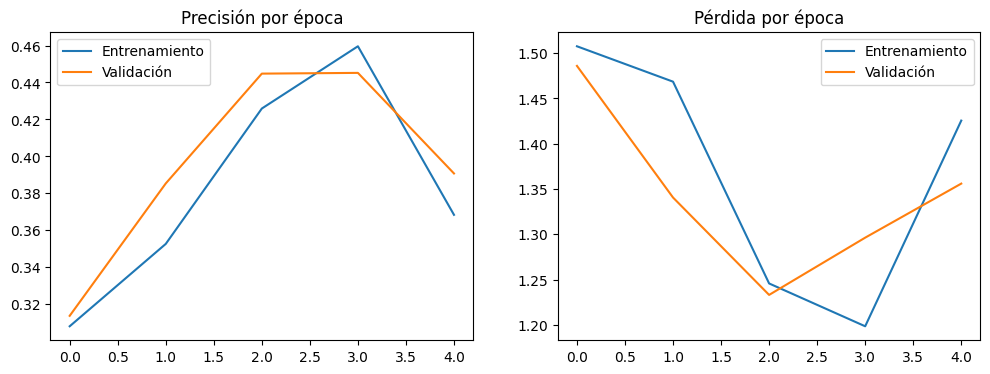

In [ ]:
# Visualización del entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión por época')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida por época')
plt.legend()
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


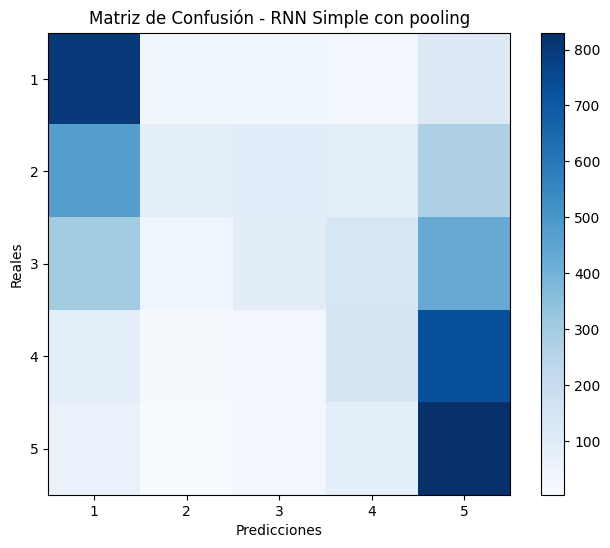

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Matriz de confusión detallada
y_pred = model_pool.predict(X_test_pad).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks(ticks=range(5), labels=range(1,6))
plt.yticks(ticks=range(5), labels=range(1,6))
plt.xlabel('Predicciones')
plt.ylabel('Reales')
plt.title('Matriz de Confusión - RNN Simple con pooling')
plt.show()

In [ ]:
# Análisis de errores frecuentes
print(classification_report(y_test, y_pred, target_names=['1★', '2★', '3★', '4★', '5★']))

              precision    recall  f1-score   support

          1★       0.46      0.80      0.59      1000
          2★       0.45      0.08      0.13      1000
          3★       0.33      0.09      0.14      1000
          4★       0.31      0.14      0.20      1000
          5★       0.35      0.83      0.49      1000

    accuracy                           0.39      5000
   macro avg       0.38      0.39      0.31      5000
weighted avg       0.38      0.39      0.31      5000



**Con embeddings de 200 dimensiones**

Esta alternativa recoge todos los estados ocultos generados para cada token y aplica una operación de pooling para obtener una representación global del texto. Aquí se muestra el ejemplo usando pooling de media, aunque se puede usar también el pooling máximo.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GlobalAveragePooling1D, Dense


# Modelo simplificado con pooling para clasificación de sentimientos (1 a 5 estrellas)
# Parámetros de ejemplo
vocab_size = len(tokenizer.word_index) + 1   # Tamaño del vocabulario
embedding_dim = 100                          # Dimensión de los embeddings
num_classes = 5                              # Por ejemplo, 5 categorías de sentimiento (1 a 5 estrellas)

model_pool = Sequential([
    # Capa de Embedding: Representa cada palabra en un espacio vectorial.
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim,
              input_length=maxlen,
              trainable=True),

    # Capa RNN: Procesa la secuencia completa y devuelve todos los estados ocultos.
    # Esto permite aplicar pooling a lo largo de la secuencia.
    SimpleRNN(128, return_sequences=True),

    # Pooling: Calcula la media de los estados ocultos para obtener una representación global.
    GlobalAveragePooling1D(),

    # Capa de Clasificación: Toma la representación agregada y asigna probabilidades a cada clase.
    Dense(num_classes, activation='softmax')
])

model_pool.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

model_pool.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

La función fit de Keras se utiliza para entrenar un modelo a partir de datos de entrenamiento.

In [ ]:
# Entrenamiento con early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3)

history = model_pool.fit(X_train_pad, y_train,
                    epochs=5,
                    batch_size=512, # se recomiendo batches de menor tamaño para mejor rendimiento (pero entrenamiento toma más tiempo)
                    validation_data=(X_valid_pad, y_valid),
                    callbacks=[early_stop])

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.2892 - loss: 1.5365 - val_accuracy: 0.2348 - val_loss: 1.5997
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.3234 - loss: 1.5311 - val_accuracy: 0.4576 - val_loss: 1.3040
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.4849 - loss: 1.2463 - val_accuracy: 0.4012 - val_loss: 1.4155
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.4710 - loss: 1.3113 - val_accuracy: 0.4772 - val_loss: 1.2251
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.5158 - loss: 1.1638 - val_accuracy: 0.4910 - val_loss: 1.2205


In [ ]:
# Evaluación del modelo
test_loss, test_acc = model_pool.evaluate(X_test_pad, y_test)
print(f"\nPrecisión en test: {test_acc:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4792 - loss: 1.2240

Precisión en test: 0.4844


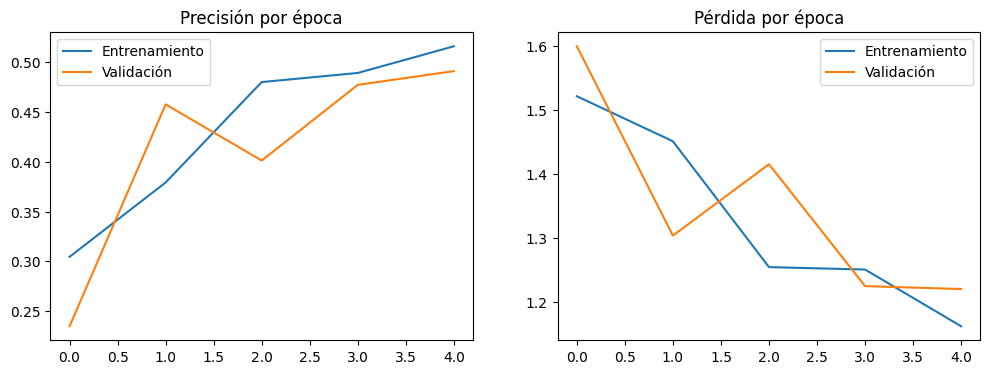

In [ ]:
# Visualización del entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión por época')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida por época')
plt.legend()
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


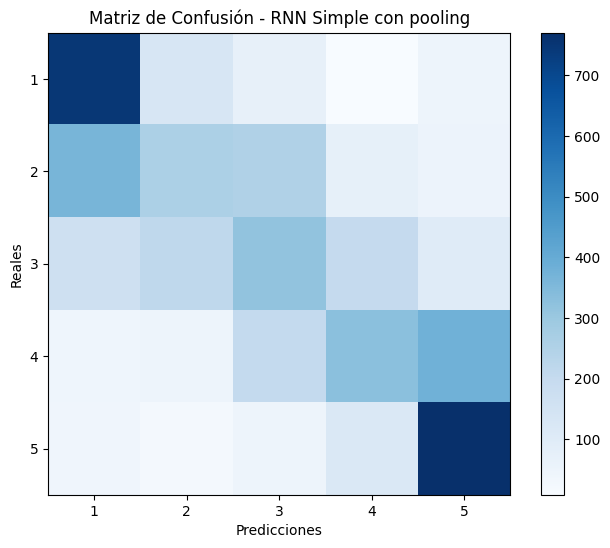

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Matriz de confusión detallada
y_pred = model_pool.predict(X_test_pad).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks(ticks=range(5), labels=range(1,6))
plt.yticks(ticks=range(5), labels=range(1,6))
plt.xlabel('Predicciones')
plt.ylabel('Reales')
plt.title('Matriz de Confusión - RNN Simple con pooling')
plt.show()

In [ ]:
# Análisis de errores frecuentes
print(classification_report(y_test, y_pred, target_names=['1★', '2★', '3★', '4★', '5★']))

              precision    recall  f1-score   support

          1★       0.55      0.75      0.63      1000
          2★       0.39      0.26      0.31      1000
          3★       0.36      0.32      0.34      1000
          4★       0.45      0.33      0.38      1000
          5★       0.57      0.77      0.66      1000

    accuracy                           0.48      5000
   macro avg       0.46      0.48      0.46      5000
weighted avg       0.46      0.48      0.46      5000



**Con embeddings de 300 dimensiones**

Esta alternativa recoge todos los estados ocultos generados para cada token y aplica una operación de pooling para obtener una representación global del texto. Aquí se muestra el ejemplo usando pooling de media, aunque se puede usar también el pooling máximo.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GlobalAveragePooling1D, Dense


# Modelo simplificado con pooling para clasificación de sentimientos (1 a 5 estrellas)
# Parámetros de ejemplo
vocab_size = len(tokenizer.word_index) + 1   # Tamaño del vocabulario
embedding_dim = 100                          # Dimensión de los embeddings
num_classes = 5                              # Por ejemplo, 5 categorías de sentimiento (1 a 5 estrellas)

model_pool = Sequential([
    # Capa de Embedding: Representa cada palabra en un espacio vectorial.
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim,
              input_length=maxlen,
              trainable=True),

    # Capa RNN: Procesa la secuencia completa y devuelve todos los estados ocultos.
    # Esto permite aplicar pooling a lo largo de la secuencia.
    SimpleRNN(128, return_sequences=True),

    # Pooling: Calcula la media de los estados ocultos para obtener una representación global.
    GlobalAveragePooling1D(),

    # Capa de Clasificación: Toma la representación agregada y asigna probabilidades a cada clase.
    Dense(num_classes, activation='softmax')
])

model_pool.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

model_pool.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

La función fit de Keras se utiliza para entrenar un modelo a partir de datos de entrenamiento.

In [ ]:
# Entrenamiento con early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3)

history = model_pool.fit(X_train_pad, y_train,
                    epochs=5,
                    batch_size=512, # se recomiendo batches de menor tamaño para mejor rendimiento (pero entrenamiento toma más tiempo)
                    validation_data=(X_valid_pad, y_valid),
                    callbacks=[early_stop])

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.2779 - loss: 1.5639 - val_accuracy: 0.2326 - val_loss: 1.5951
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.3402 - loss: 1.5471 - val_accuracy: 0.3888 - val_loss: 1.4392
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.4356 - loss: 1.2912 - val_accuracy: 0.4892 - val_loss: 1.1631
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.5240 - loss: 1.0921 - val_accuracy: 0.5048 - val_loss: 1.1447
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.5525 - loss: 1.0367 - val_accuracy: 0.5078 - val_loss: 1.1628


In [ ]:
# Evaluación del modelo
test_loss, test_acc = model_pool.evaluate(X_test_pad, y_test)
print(f"\nPrecisión en test: {test_acc:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5095 - loss: 1.1645

Precisión en test: 0.5152


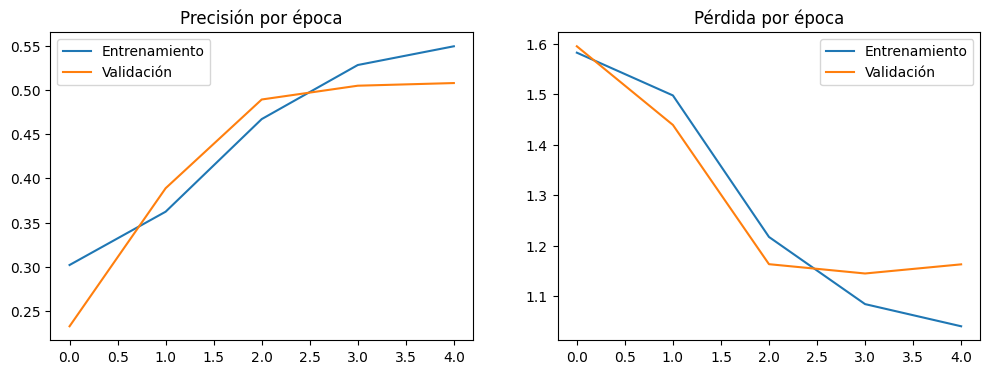

In [ ]:
# Visualización del entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión por época')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida por época')
plt.legend()
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


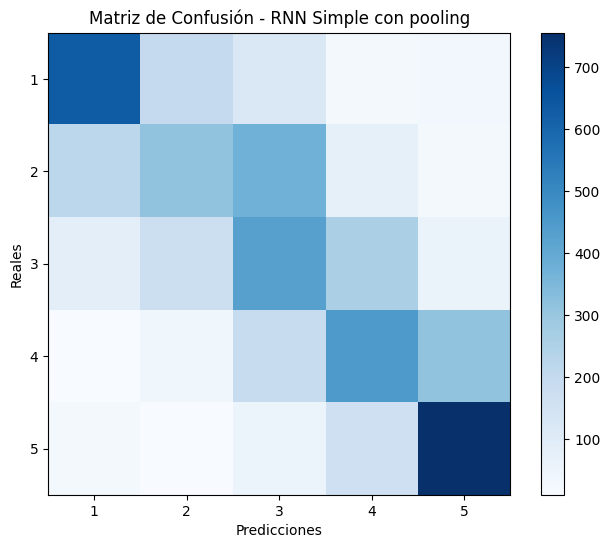

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Matriz de confusión detallada
y_pred = model_pool.predict(X_test_pad).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks(ticks=range(5), labels=range(1,6))
plt.yticks(ticks=range(5), labels=range(1,6))
plt.xlabel('Predicciones')
plt.ylabel('Reales')
plt.title('Matriz de Confusión - RNN Simple con pooling')
plt.show()

In [ ]:
# Análisis de errores frecuentes
print(classification_report(y_test, y_pred, target_names=['1★', '2★', '3★', '4★', '5★']))

              precision    recall  f1-score   support

          1★       0.65      0.63      0.64      1000
          2★       0.43      0.31      0.36      1000
          3★       0.37      0.43      0.40      1000
          4★       0.47      0.45      0.46      1000
          5★       0.64      0.76      0.69      1000

    accuracy                           0.52      5000
   macro avg       0.51      0.52      0.51      5000
weighted avg       0.51      0.52      0.51      5000



**Nos quedamos con los embeddings de 300 dimensiones para el resto de los modelos, ya que son los que mejores resultados nos han dado hasta ahora.**

## Red neuronal RNN básica con pooling y embeddings de 300 dimensiones: comparación 64, 128 y 256 neuronas

**Con 128 neuronas**

Esta alternativa recoge todos los estados ocultos generados para cada token y aplica una operación de pooling para obtener una representación global del texto. Aquí se muestra el ejemplo usando pooling de media, aunque se puede usar también el pooling máximo.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GlobalAveragePooling1D, Dense


# Modelo simplificado con pooling para clasificación de sentimientos (1 a 5 estrellas)
# Parámetros de ejemplo
vocab_size = len(tokenizer.word_index) + 1   # Tamaño del vocabulario
embedding_dim = 300                          # Dimensión de los embeddings
num_classes = 5                              # Por ejemplo, 5 categorías de sentimiento (1 a 5 estrellas)

model_pool = Sequential([
    # Capa de Embedding: Representa cada palabra en un espacio vectorial.
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim,
              input_length=maxlen,
              trainable=True),

    # Capa RNN: Procesa la secuencia completa y devuelve todos los estados ocultos.
    # Esto permite aplicar pooling a lo largo de la secuencia.
    SimpleRNN(128, return_sequences=True),

    # Pooling: Calcula la media de los estados ocultos para obtener una representación global.
    GlobalAveragePooling1D(),

    # Capa de Clasificación: Toma la representación agregada y asigna probabilidades a cada clase.
    Dense(num_classes, activation='softmax')
])

model_pool.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

model_pool.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_3      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

La función fit de Keras se utiliza para entrenar un modelo a partir de datos de entrenamiento.

In [ ]:
# Entrenamiento con early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3)

history = model_pool.fit(X_train_pad, y_train,
                    epochs=5,
                    batch_size=512, # se recomiendo batches de menor tamaño para mejor rendimiento (pero entrenamiento toma más tiempo)
                    validation_data=(X_valid_pad, y_valid),
                    callbacks=[early_stop])

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.3095 - loss: 1.5288 - val_accuracy: 0.4034 - val_loss: 1.5290
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.4648 - loss: 1.2691 - val_accuracy: 0.4824 - val_loss: 1.2135
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.4979 - loss: 1.1894 - val_accuracy: 0.4800 - val_loss: 1.2270
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.5286 - loss: 1.1278 - val_accuracy: 0.4892 - val_loss: 1.2208
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.5487 - loss: 1.0844 - val_accuracy: 0.5018 - val_loss: 1.2079


In [ ]:
# Evaluación del modelo
test_loss, test_acc = model_pool.evaluate(X_test_pad, y_test)
print(f"\nPrecisión en test: {test_acc:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4899 - loss: 1.2201

Precisión en test: 0.5048


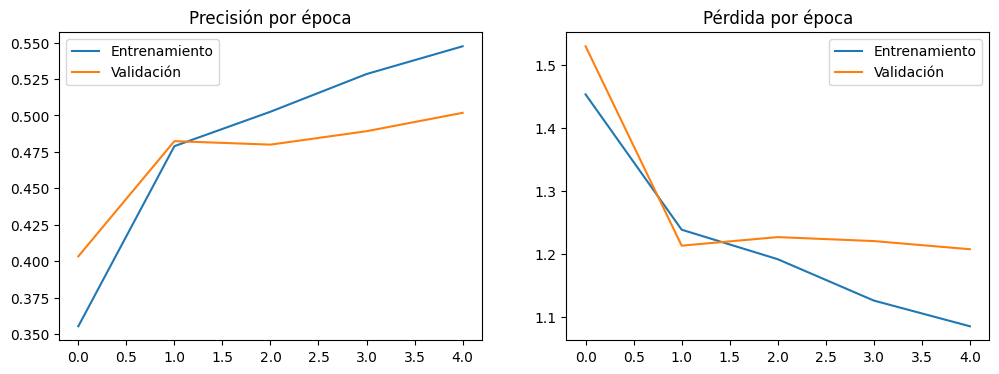

In [ ]:
# Visualización del entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión por época')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida por época')
plt.legend()
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


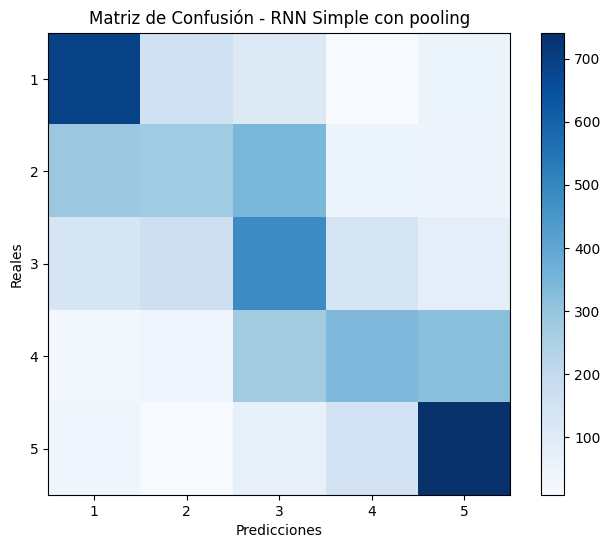

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Matriz de confusión detallada
y_pred = model_pool.predict(X_test_pad).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks(ticks=range(5), labels=range(1,6))
plt.yticks(ticks=range(5), labels=range(1,6))
plt.xlabel('Predicciones')
plt.ylabel('Reales')
plt.title('Matriz de Confusión - RNN Simple con pooling')
plt.show()

In [ ]:
# Análisis de errores frecuentes
print(classification_report(y_test, y_pred, target_names=['1★', '2★', '3★', '4★', '5★']))

              precision    recall  f1-score   support

          1★       0.58      0.69      0.63      1000
          2★       0.43      0.28      0.33      1000
          3★       0.38      0.48      0.42      1000
          4★       0.50      0.34      0.40      1000
          5★       0.60      0.74      0.66      1000

    accuracy                           0.50      5000
   macro avg       0.50      0.50      0.49      5000
weighted avg       0.50      0.50      0.49      5000



**Con 64 neuronas**

Esta alternativa recoge todos los estados ocultos generados para cada token y aplica una operación de pooling para obtener una representación global del texto. Aquí se muestra el ejemplo usando pooling de media, aunque se puede usar también el pooling máximo.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GlobalAveragePooling1D, Dense


# Modelo simplificado con pooling para clasificación de sentimientos (1 a 5 estrellas)
# Parámetros de ejemplo
vocab_size = len(tokenizer.word_index) + 1   # Tamaño del vocabulario
embedding_dim = 300                          # Dimensión de los embeddings
num_classes = 5                              # Por ejemplo, 5 categorías de sentimiento (1 a 5 estrellas)

model_pool = Sequential([
    # Capa de Embedding: Representa cada palabra en un espacio vectorial.
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim,
              input_length=maxlen,
              trainable=True),

    # Capa RNN: Procesa la secuencia completa y devuelve todos los estados ocultos.
    # Esto permite aplicar pooling a lo largo de la secuencia.
    SimpleRNN(64, return_sequences=True),

    # Pooling: Calcula la media de los estados ocultos para obtener una representación global.
    GlobalAveragePooling1D(),

    # Capa de Clasificación: Toma la representación agregada y asigna probabilidades a cada clase.
    Dense(num_classes, activation='softmax')
])

model_pool.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

model_pool.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_4      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

La función fit de Keras se utiliza para entrenar un modelo a partir de datos de entrenamiento.

In [ ]:
# Entrenamiento con early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3)

history = model_pool.fit(X_train_pad, y_train,
                    epochs=5,
                    batch_size=512, # se recomiendo batches de menor tamaño para mejor rendimiento (pero entrenamiento toma más tiempo)
                    validation_data=(X_valid_pad, y_valid),
                    callbacks=[early_stop])

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.3052 - loss: 1.5342 - val_accuracy: 0.3794 - val_loss: 1.3851
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.3832 - loss: 1.3845 - val_accuracy: 0.3762 - val_loss: 1.3567
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.4178 - loss: 1.3202 - val_accuracy: 0.3292 - val_loss: 1.4875
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.4397 - loss: 1.3553 - val_accuracy: 0.4592 - val_loss: 1.2944
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.5073 - loss: 1.2096 - val_accuracy: 0.4680 - val_loss: 1.2672


In [ ]:
# Evaluación del modelo
test_loss, test_acc = model_pool.evaluate(X_test_pad, y_test)
print(f"\nPrecisión en test: {test_acc:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4602 - loss: 1.2728

Precisión en test: 0.4754


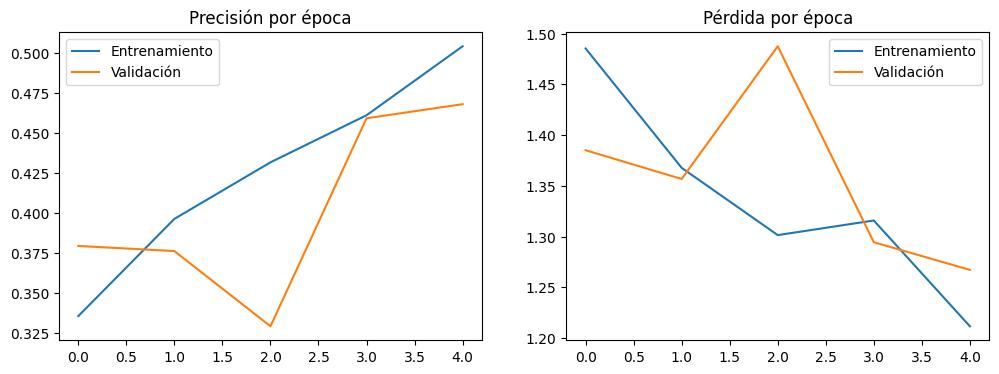

In [ ]:
# Visualización del entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión por época')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida por época')
plt.legend()
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


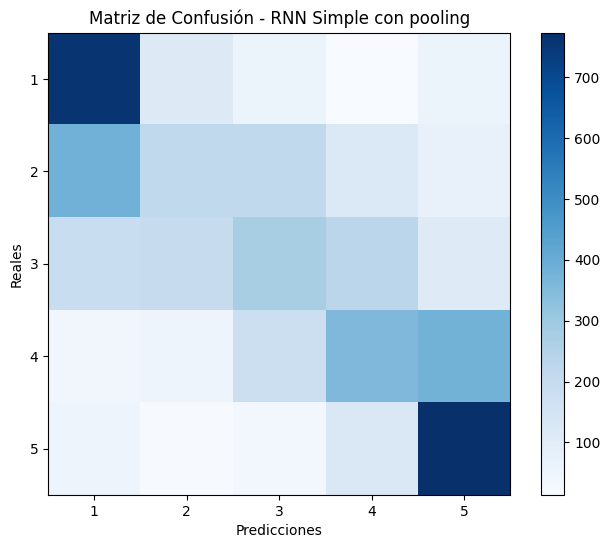

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Matriz de confusión detallada
y_pred = model_pool.predict(X_test_pad).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks(ticks=range(5), labels=range(1,6))
plt.yticks(ticks=range(5), labels=range(1,6))
plt.xlabel('Predicciones')
plt.ylabel('Reales')
plt.title('Matriz de Confusión - RNN Simple con pooling')
plt.show()

In [ ]:
# Análisis de errores frecuentes
print(classification_report(y_test, y_pred, target_names=['1★', '2★', '3★', '4★', '5★']))

              precision    recall  f1-score   support

          1★       0.54      0.76      0.63      1000
          2★       0.36      0.21      0.27      1000
          3★       0.36      0.27      0.31      1000
          4★       0.42      0.35      0.39      1000
          5★       0.56      0.77      0.65      1000

    accuracy                           0.48      5000
   macro avg       0.45      0.48      0.45      5000
weighted avg       0.45      0.48      0.45      5000



**Con 256 neuronas**

Esta alternativa recoge todos los estados ocultos generados para cada token y aplica una operación de pooling para obtener una representación global del texto. Aquí se muestra el ejemplo usando pooling de media, aunque se puede usar también el pooling máximo.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GlobalAveragePooling1D, Dense


# Modelo simplificado con pooling para clasificación de sentimientos (1 a 5 estrellas)
# Parámetros de ejemplo
vocab_size = len(tokenizer.word_index) + 1   # Tamaño del vocabulario
embedding_dim = 300                          # Dimensión de los embeddings
num_classes = 5                              # Por ejemplo, 5 categorías de sentimiento (1 a 5 estrellas)

model_pool = Sequential([
    # Capa de Embedding: Representa cada palabra en un espacio vectorial.
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim,
              input_length=maxlen,
              trainable=True),

    # Capa RNN: Procesa la secuencia completa y devuelve todos los estados ocultos.
    # Esto permite aplicar pooling a lo largo de la secuencia.
    SimpleRNN(256, return_sequences=True),

    # Pooling: Calcula la media de los estados ocultos para obtener una representación global.
    GlobalAveragePooling1D(),

    # Capa de Clasificación: Toma la representación agregada y asigna probabilidades a cada clase.
    Dense(num_classes, activation='softmax')
])

model_pool.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

model_pool.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_5      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

La función fit de Keras se utiliza para entrenar un modelo a partir de datos de entrenamiento.

In [ ]:
# Entrenamiento con early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3)

history = model_pool.fit(X_train_pad, y_train,
                    epochs=5,
                    batch_size=512, # se recomiendo batches de menor tamaño para mejor rendimiento (pero entrenamiento toma más tiempo)
                    validation_data=(X_valid_pad, y_valid),
                    callbacks=[early_stop])

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.2771 - loss: 1.5542 - val_accuracy: 0.2844 - val_loss: 1.5642
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.2741 - loss: 1.5686 - val_accuracy: 0.3612 - val_loss: 1.3980
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.3422 - loss: 1.4715 - val_accuracy: 0.4060 - val_loss: 1.3684
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.4210 - loss: 1.3460 - val_accuracy: 0.4422 - val_loss: 1.2684
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.4803 - loss: 1.2384 - val_accuracy: 0.4694 - val_loss: 1.2524


In [ ]:
# Evaluación del modelo
test_loss, test_acc = model_pool.evaluate(X_test_pad, y_test)
print(f"\nPrecisión en test: {test_acc:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4729 - loss: 1.2621

Precisión en test: 0.4762


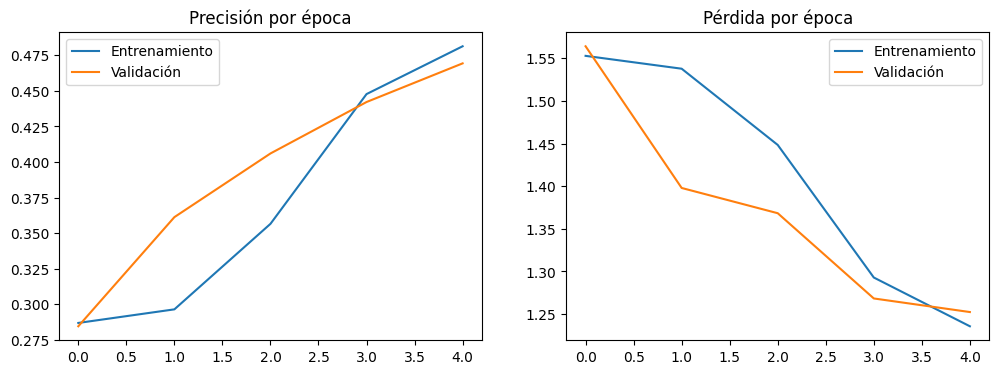

In [ ]:
# Visualización del entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión por época')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida por época')
plt.legend()
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


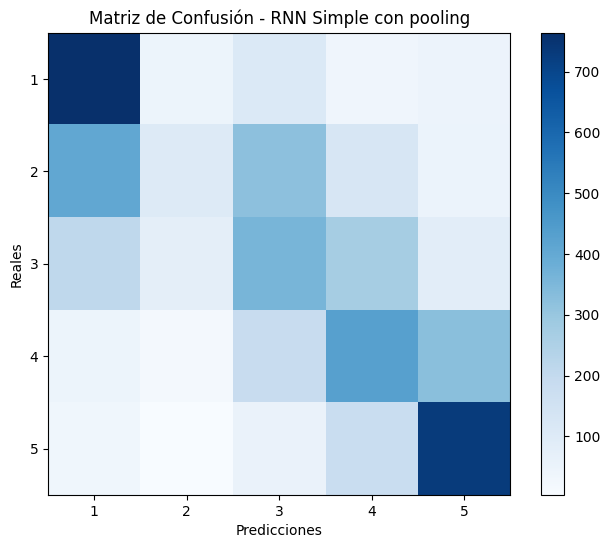

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Matriz de confusión detallada
y_pred = model_pool.predict(X_test_pad).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks(ticks=range(5), labels=range(1,6))
plt.yticks(ticks=range(5), labels=range(1,6))
plt.xlabel('Predicciones')
plt.ylabel('Reales')
plt.title('Matriz de Confusión - RNN Simple con pooling')
plt.show()

In [ ]:
# Análisis de errores frecuentes
print(classification_report(y_test, y_pred, target_names=['1★', '2★', '3★', '4★', '5★']))

              precision    recall  f1-score   support

          1★       0.53      0.76      0.62      1000
          2★       0.41      0.10      0.16      1000
          3★       0.35      0.36      0.35      1000
          4★       0.41      0.43      0.42      1000
          5★       0.59      0.73      0.65      1000

    accuracy                           0.48      5000
   macro avg       0.46      0.48      0.44      5000
weighted avg       0.46      0.48      0.44      5000



**Nos quedamos con las 128 neuronas y los embeddings de 300 dimensiones para el resto de los modelos, ya que son los que mejores resultados nos han dado hasta ahora.**

## Red neuronal RNN básica con pooling, 128 neuronas y embeddings de 300 dimensiones: comparación de 5, 10, 20 y 50 epochs

**Con 5 epochs (patience 3)**

Esta alternativa recoge todos los estados ocultos generados para cada token y aplica una operación de pooling para obtener una representación global del texto. Aquí se muestra el ejemplo usando pooling de media, aunque se puede usar también el pooling máximo.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GlobalAveragePooling1D, Dense


# Modelo simplificado con pooling para clasificación de sentimientos (1 a 5 estrellas)
# Parámetros de ejemplo
vocab_size = len(tokenizer.word_index) + 1   # Tamaño del vocabulario
embedding_dim = 300                          # Dimensión de los embeddings
num_classes = 5                              # Por ejemplo, 5 categorías de sentimiento (1 a 5 estrellas)

model_pool = Sequential([
    # Capa de Embedding: Representa cada palabra en un espacio vectorial.
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim,
              input_length=maxlen,
              trainable=True),

    # Capa RNN: Procesa la secuencia completa y devuelve todos los estados ocultos.
    # Esto permite aplicar pooling a lo largo de la secuencia.
    SimpleRNN(128, return_sequences=True),

    # Pooling: Calcula la media de los estados ocultos para obtener una representación global.
    GlobalAveragePooling1D(),

    # Capa de Clasificación: Toma la representación agregada y asigna probabilidades a cada clase.
    Dense(num_classes, activation='softmax')
])

model_pool.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

model_pool.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_6      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

La función fit de Keras se utiliza para entrenar un modelo a partir de datos de entrenamiento.

In [ ]:
# Entrenamiento con early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3)

history = model_pool.fit(X_train_pad, y_train,
                    epochs=5,
                    batch_size=512, # se recomiendo batches de menor tamaño para mejor rendimiento (pero entrenamiento toma más tiempo)
                    validation_data=(X_valid_pad, y_valid),
                    callbacks=[early_stop])

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.2997 - loss: 1.5347 - val_accuracy: 0.4328 - val_loss: 1.3593
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.4543 - loss: 1.3021 - val_accuracy: 0.4812 - val_loss: 1.2380
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.5179 - loss: 1.1673 - val_accuracy: 0.4594 - val_loss: 1.2610
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.5316 - loss: 1.1237 - val_accuracy: 0.5096 - val_loss: 1.1672
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.5478 - loss: 1.0682 - val_accuracy: 0.4990 - val_loss: 1.2074


In [ ]:
# Evaluación del modelo
test_loss, test_acc = model_pool.evaluate(X_test_pad, y_test)
print(f"\nPrecisión en test: {test_acc:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4968 - loss: 1.2085

Precisión en test: 0.5022


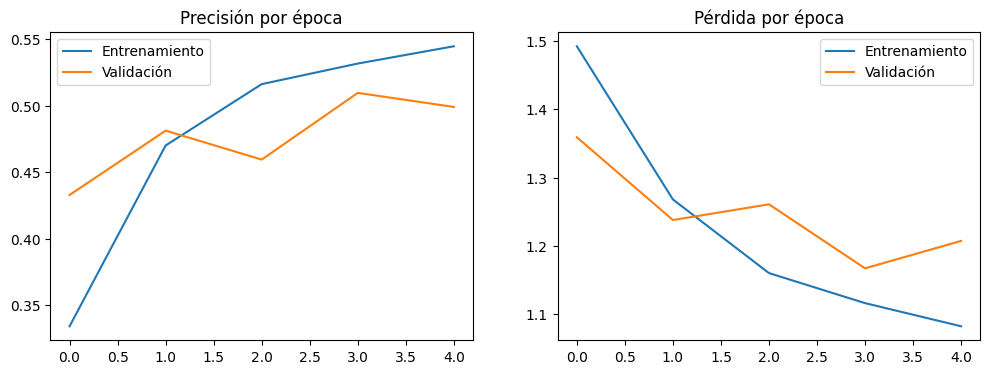

In [ ]:
# Visualización del entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión por época')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida por época')
plt.legend()
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


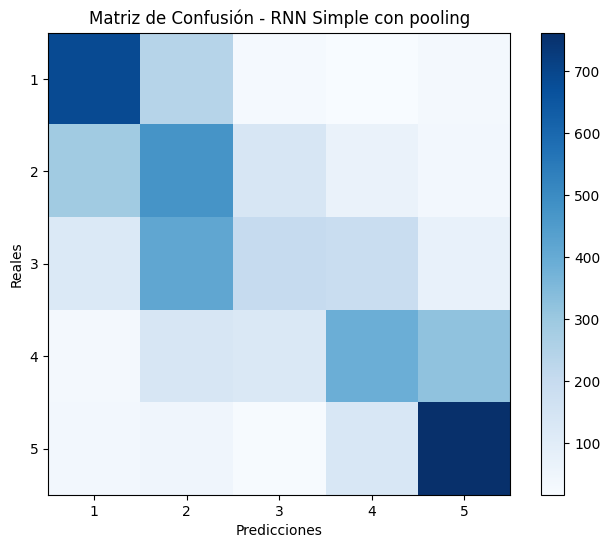

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Matriz de confusión detallada
y_pred = model_pool.predict(X_test_pad).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks(ticks=range(5), labels=range(1,6))
plt.yticks(ticks=range(5), labels=range(1,6))
plt.xlabel('Predicciones')
plt.ylabel('Reales')
plt.title('Matriz de Confusión - RNN Simple con pooling')
plt.show()

In [ ]:
# Análisis de errores frecuentes
print(classification_report(y_test, y_pred, target_names=['1★', '2★', '3★', '4★', '5★']))

              precision    recall  f1-score   support

          1★       0.59      0.69      0.63      1000
          2★       0.36      0.47      0.41      1000
          3★       0.40      0.20      0.27      1000
          4★       0.49      0.39      0.43      1000
          5★       0.62      0.76      0.69      1000

    accuracy                           0.50      5000
   macro avg       0.49      0.50      0.49      5000
weighted avg       0.49      0.50      0.49      5000



**Con 10 epochs (patience 3)**

Esta alternativa recoge todos los estados ocultos generados para cada token y aplica una operación de pooling para obtener una representación global del texto. Aquí se muestra el ejemplo usando pooling de media, aunque se puede usar también el pooling máximo.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GlobalAveragePooling1D, Dense


# Modelo simplificado con pooling para clasificación de sentimientos (1 a 5 estrellas)
# Parámetros de ejemplo
vocab_size = len(tokenizer.word_index) + 1   # Tamaño del vocabulario
embedding_dim = 300                          # Dimensión de los embeddings
num_classes = 5                              # Por ejemplo, 5 categorías de sentimiento (1 a 5 estrellas)

model_pool = Sequential([
    # Capa de Embedding: Representa cada palabra en un espacio vectorial.
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim,
              input_length=maxlen,
              trainable=True),

    # Capa RNN: Procesa la secuencia completa y devuelve todos los estados ocultos.
    # Esto permite aplicar pooling a lo largo de la secuencia.
    SimpleRNN(128, return_sequences=True),

    # Pooling: Calcula la media de los estados ocultos para obtener una representación global.
    GlobalAveragePooling1D(),

    # Capa de Clasificación: Toma la representación agregada y asigna probabilidades a cada clase.
    Dense(num_classes, activation='softmax')
])

model_pool.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

model_pool.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_7 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_7      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

La función fit de Keras se utiliza para entrenar un modelo a partir de datos de entrenamiento.

In [ ]:
# Entrenamiento con early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3)

history = model_pool.fit(X_train_pad, y_train,
                    epochs=10,
                    batch_size=512, # se recomiendo batches de menor tamaño para mejor rendimiento (pero entrenamiento toma más tiempo)
                    validation_data=(X_valid_pad, y_valid),
                    callbacks=[early_stop])

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.3095 - loss: 1.5291 - val_accuracy: 0.4540 - val_loss: 1.2965
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.4750 - loss: 1.2650 - val_accuracy: 0.4828 - val_loss: 1.2432
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.5160 - loss: 1.1684 - val_accuracy: 0.5010 - val_loss: 1.2072
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.5395 - loss: 1.1069 - val_accuracy: 0.5000 - val_loss: 1.1799
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.5523 - loss: 1.0684 - val_accuracy: 0.5016 - val_loss: 1.1996
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.5653 - loss: 1.0393 - val_accuracy: 0.4984 - val_loss: 1.1797
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.5773 - loss: 0.9934 - val_accuracy: 0.5118 - val_loss: 1.1783
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.5914 - loss: 0.9649 - 

In [ ]:
# Evaluación del modelo
test_loss, test_acc = model_pool.evaluate(X_test_pad, y_test)
print(f"\nPrecisión en test: {test_acc:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4957 - loss: 1.2199

Precisión en test: 0.4976


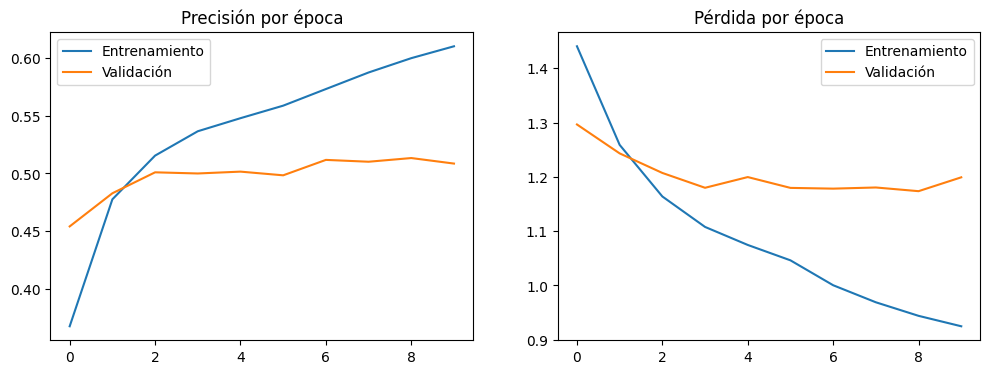

In [ ]:
# Visualización del entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión por época')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida por época')
plt.legend()
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


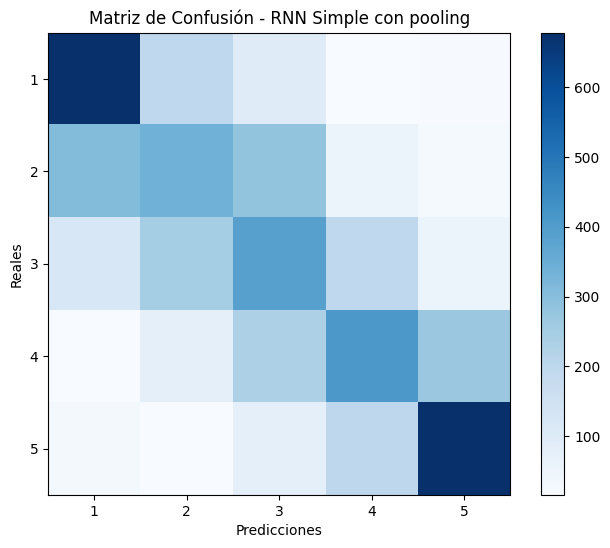

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Matriz de confusión detallada
y_pred = model_pool.predict(X_test_pad).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks(ticks=range(5), labels=range(1,6))
plt.yticks(ticks=range(5), labels=range(1,6))
plt.xlabel('Predicciones')
plt.ylabel('Reales')
plt.title('Matriz de Confusión - RNN Simple con pooling')
plt.show()

In [ ]:
# Análisis de errores frecuentes
print(classification_report(y_test, y_pred, target_names=['1★', '2★', '3★', '4★', '5★']))

              precision    recall  f1-score   support

          1★       0.59      0.68      0.63      1000
          2★       0.39      0.34      0.36      1000
          3★       0.36      0.39      0.37      1000
          4★       0.47      0.41      0.44      1000
          5★       0.65      0.68      0.66      1000

    accuracy                           0.50      5000
   macro avg       0.49      0.50      0.49      5000
weighted avg       0.49      0.50      0.49      5000



**Con 20 epochs (patience 5)**

Esta alternativa recoge todos los estados ocultos generados para cada token y aplica una operación de pooling para obtener una representación global del texto. Aquí se muestra el ejemplo usando pooling de media, aunque se puede usar también el pooling máximo.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GlobalAveragePooling1D, Dense


# Modelo simplificado con pooling para clasificación de sentimientos (1 a 5 estrellas)
# Parámetros de ejemplo
vocab_size = len(tokenizer.word_index) + 1   # Tamaño del vocabulario
embedding_dim = 300                          # Dimensión de los embeddings
num_classes = 5                              # Por ejemplo, 5 categorías de sentimiento (1 a 5 estrellas)

model_pool = Sequential([
    # Capa de Embedding: Representa cada palabra en un espacio vectorial.
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim,
              input_length=maxlen,
              trainable=True),

    # Capa RNN: Procesa la secuencia completa y devuelve todos los estados ocultos.
    # Esto permite aplicar pooling a lo largo de la secuencia.
    SimpleRNN(128, return_sequences=True),

    # Pooling: Calcula la media de los estados ocultos para obtener una representación global.
    GlobalAveragePooling1D(),

    # Capa de Clasificación: Toma la representación agregada y asigna probabilidades a cada clase.
    Dense(num_classes, activation='softmax')
])

model_pool.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

model_pool.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_8 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_8      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

La función fit de Keras se utiliza para entrenar un modelo a partir de datos de entrenamiento.

In [ ]:
# Entrenamiento con early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5)

history = model_pool.fit(X_train_pad, y_train,
                    epochs=20,
                    batch_size=512, # se recomiendo batches de menor tamaño para mejor rendimiento (pero entrenamiento toma más tiempo)
                    validation_data=(X_valid_pad, y_valid),
                    callbacks=[early_stop])

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.3048 - loss: 1.5297 - val_accuracy: 0.3618 - val_loss: 1.9025
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.4257 - loss: 1.3683 - val_accuracy: 0.4710 - val_loss: 1.2584
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.5108 - loss: 1.1807 - val_accuracy: 0.4842 - val_loss: 1.2216
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.5338 - loss: 1.1176 - val_accuracy: 0.4876 - val_loss: 1.2069
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.5153 - loss: 1.1518 - val_accuracy: 0.4894 - val_loss: 1.2106
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.5263 - loss: 1.1272 - val_accuracy: 0.4926 - val_loss: 1.2053
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.5614 - loss: 1.0555 - val_accuracy: 0.4986 - val_loss: 1.2078
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.5761 - loss: 1.0223 - 

In [ ]:
# Evaluación del modelo
test_loss, test_acc = model_pool.evaluate(X_test_pad, y_test)
print(f"\nPrecisión en test: {test_acc:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4996 - loss: 1.2547

Precisión en test: 0.5018


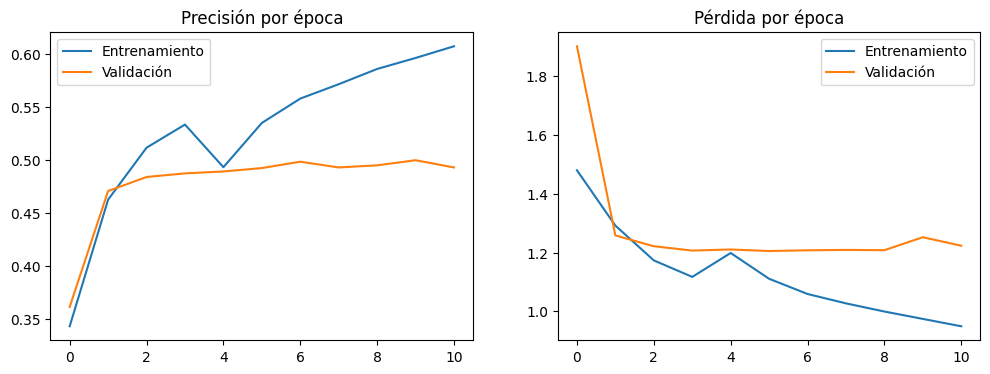

In [ ]:
# Visualización del entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión por época')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida por época')
plt.legend()
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


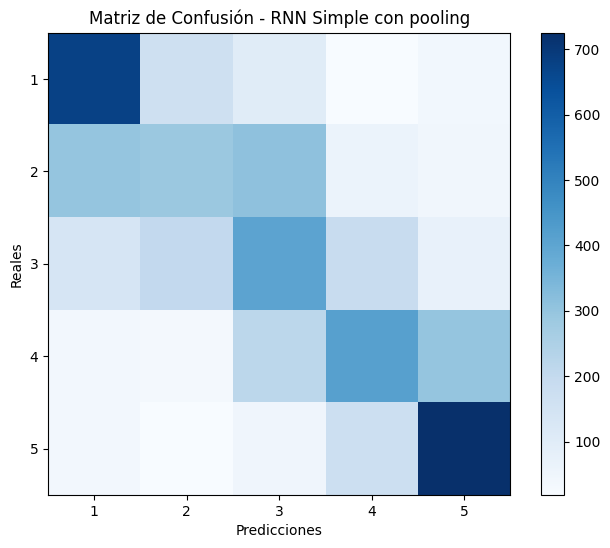

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Matriz de confusión detallada
y_pred = model_pool.predict(X_test_pad).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks(ticks=range(5), labels=range(1,6))
plt.yticks(ticks=range(5), labels=range(1,6))
plt.xlabel('Predicciones')
plt.ylabel('Reales')
plt.title('Matriz de Confusión - RNN Simple con pooling')
plt.show()

In [ ]:
# Análisis de errores frecuentes
print(classification_report(y_test, y_pred, target_names=['1★', '2★', '3★', '4★', '5★']))

              precision    recall  f1-score   support

          1★       0.57      0.68      0.62      1000
          2★       0.41      0.29      0.34      1000
          3★       0.38      0.41      0.39      1000
          4★       0.49      0.41      0.45      1000
          5★       0.61      0.72      0.67      1000

    accuracy                           0.50      5000
   macro avg       0.49      0.50      0.49      5000
weighted avg       0.49      0.50      0.49      5000



**Con 50 epochs (patience 10)**

Esta alternativa recoge todos los estados ocultos generados para cada token y aplica una operación de pooling para obtener una representación global del texto. Aquí se muestra el ejemplo usando pooling de media, aunque se puede usar también el pooling máximo.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GlobalAveragePooling1D, Dense


# Modelo simplificado con pooling para clasificación de sentimientos (1 a 5 estrellas)
# Parámetros de ejemplo
vocab_size = len(tokenizer.word_index) + 1   # Tamaño del vocabulario
embedding_dim = 300                          # Dimensión de los embeddings
num_classes = 5                              # Por ejemplo, 5 categorías de sentimiento (1 a 5 estrellas)

model_pool = Sequential([
    # Capa de Embedding: Representa cada palabra en un espacio vectorial.
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim,
              input_length=maxlen,
              trainable=True),

    # Capa RNN: Procesa la secuencia completa y devuelve todos los estados ocultos.
    # Esto permite aplicar pooling a lo largo de la secuencia.
    SimpleRNN(128, return_sequences=True),

    # Pooling: Calcula la media de los estados ocultos para obtener una representación global.
    GlobalAveragePooling1D(),

    # Capa de Clasificación: Toma la representación agregada y asigna probabilidades a cada clase.
    Dense(num_classes, activation='softmax')
])

model_pool.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

model_pool.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_9 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_9      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

La función fit de Keras se utiliza para entrenar un modelo a partir de datos de entrenamiento.

In [ ]:
# Entrenamiento con early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10)

history = model_pool.fit(X_train_pad, y_train,
                    epochs=50,
                    batch_size=512, # se recomiendo batches de menor tamaño para mejor rendimiento (pero entrenamiento toma más tiempo)
                    validation_data=(X_valid_pad, y_valid),
                    callbacks=[early_stop])

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.3042 - loss: 1.5277 - val_accuracy: 0.4438 - val_loss: 1.3362
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.4749 - loss: 1.2736 - val_accuracy: 0.4864 - val_loss: 1.2533
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.5213 - loss: 1.1557 - val_accuracy: 0.5014 - val_loss: 1.2095
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.5460 - loss: 1.0915 - val_accuracy: 0.4990 - val_loss: 1.1870
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.5638 - loss: 1.0201 - val_accuracy: 0.5024 - val_loss: 1.1502
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.5820 - loss: 0.9811 - val_accuracy: 0.5098 - val_loss: 1.1532
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.5949 - loss: 0.9560 - val_accuracy: 0.5008 - val_loss: 1.1801
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.6087 - loss: 0.9277 - 

In [ ]:
# Evaluación del modelo
test_loss, test_acc = model_pool.evaluate(X_test_pad, y_test)
print(f"\nPrecisión en test: {test_acc:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5003 - loss: 1.3060

Precisión en test: 0.5040


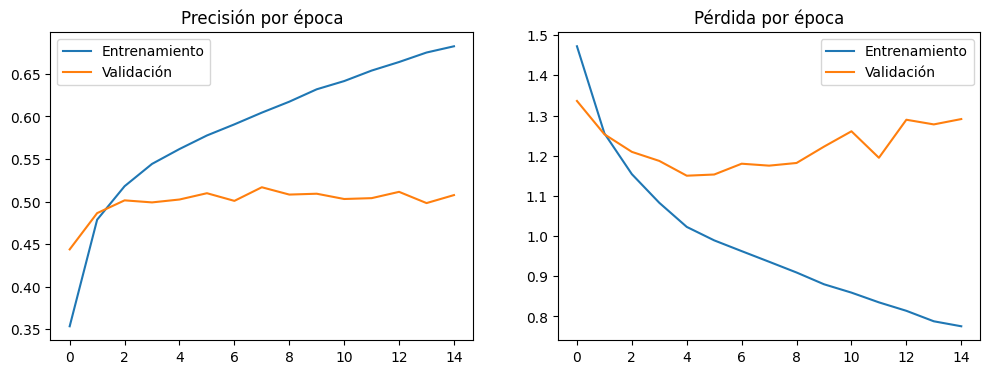

In [ ]:
# Visualización del entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión por época')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida por época')
plt.legend()
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


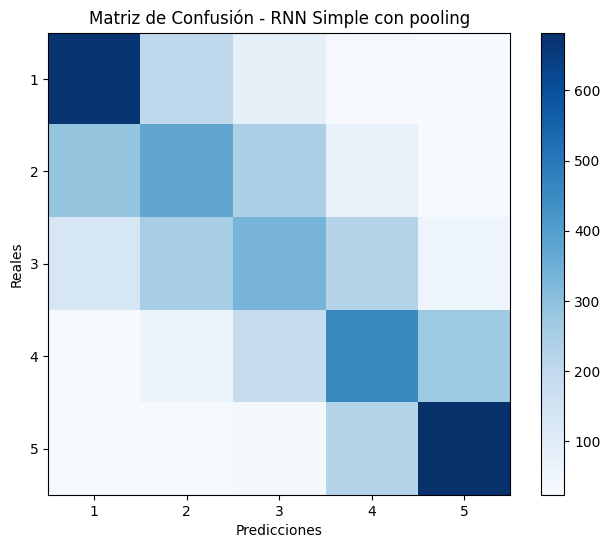

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Matriz de confusión detallada
y_pred = model_pool.predict(X_test_pad).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks(ticks=range(5), labels=range(1,6))
plt.yticks(ticks=range(5), labels=range(1,6))
plt.xlabel('Predicciones')
plt.ylabel('Reales')
plt.title('Matriz de Confusión - RNN Simple con pooling')
plt.show()

In [ ]:
# Análisis de errores frecuentes
print(classification_report(y_test, y_pred, target_names=['1★', '2★', '3★', '4★', '5★']))

              precision    recall  f1-score   support

          1★       0.59      0.67      0.62      1000
          2★       0.41      0.38      0.39      1000
          3★       0.39      0.34      0.36      1000
          4★       0.45      0.46      0.46      1000
          5★       0.64      0.68      0.66      1000

    accuracy                           0.50      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       0.50      0.50      0.50      5000



**Nos quedamos con las 128 neuronas, los embeddings de 300 dimensiones y los 50 epochs con patience 10 para el resto de los modelos, ya que son los que mejores resultados nos han dado hasta ahora. De hecho, conseguimos una f1-score de 0.50 tanto para accuracy como para macro avg y weighted avg. Este es el mejor resultado que hemos obtenido de todas las combinaciones que hemos probado.**

Para probar distintas combinaciones de parámetros, he seguido una metodología sistemática y coherente comprobando primero las variaciones de uno solo parámetro para así quedarme con la opción que mejores resultados ofrece. Definido así el primer parámetro, podemos pasar al siguiente y probar también todas sus opciones manteniendo estable el primer parámetro seleccionado para todas ellas, y así sucesivamente, hasta que todos hayan quedado definidos.  

Durante el proceso de entrenamiento del modelo con una red neuronal básica con pooling, he evaluado distintas configuraciones para encontrar la combinación óptima teniendo en cuenta los siguientes factores: dimensión de los embeddings, número de neuronas en la capa oculta y número de épocas (con la patience correspondiente). Después del experimento nos quedamos con las 128 neuronas, los embeddings de 300 dimensiones y los 50 epochs con patience 10, ya que son los que mejores resultados nos han dado hasta ahora. De hecho, conseguimos una f1-score de 0.50 tanto para accuracy como para macro avg y weighted avg. Este es el mejor resultado que hemos obtenido de todas las combinaciones que hemos probado.

**Dimensión de los embeddings**: He probado con vectores de embeddings de 100, 200 y 300 dimensiones. El modelo con embeddings de 300 dimensiones es el que ha obtenido el mejor rendimiento general. Esto puede explicarse porque los embeddings de mayor dimensión permiten una representación semántica más rica de las palabras, capturando matices más complejos del lenguaje. Aunque los embeddings de menor dimensión son más eficientes computacionalmente, en este caso la mejora en la precisión justifica el coste computacional mayor en el que incurrimos.

**Número de neuronas en la capa oculta**: Una vez fijado el tamaño óptimo de los embeddings (300 dimensiones), he probado de adaptar la capacidad del modelo variando el número de neuronas en la capa densa (64, 128 y 256). El mejor rendimiento lo he conseguido con 128 neuronas, que, al ser la opción intermedia, equilibra la capacidad de aprendizaje y el riesgo de sobreajuste. Con 64 neuronas, el modelo probablemente no disponía de suficiente capacidad para aprender patrones complejos; mientras que con 256 neuronas, no hubo una mejora significativa debido al sobreajuste.

**Número de épocas de entrenamiento**: Por último, he experimentado con distintas duraciones del entrenamiento (5, 10, 20 y 50 épocas). Cabe comentar que la variación en la cantidad de epochs no ha modificado prácticamente nada los resultados. De todas formas, debemos tener en cuenta que siempre hemos adaptado la patience proporcionalmente a la cantidad de epochs seleccionada, pudiendo ser este un aspecto que ha incidido en los resultados. En conclusión, esto justificaría que no hayamos observado diferencias significativas en el rendimiento final. De hecho, esto permite que el modelo deje de entrenar una vez alcanzada la convergencia, independientemente del máximo de épocas establecido. Este comportamiento indica que el modelo converge rápidamente y que extender las épocas más allá de un cierto punto no aporta más beneficios.